In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, plot_confusion_matrix, accuracy_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from xgboost import XGBRegressor
from numpy import absolute,std, mean
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor, MLPClassifier
# import tensorflow as tf
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import math

Importing the data from the database file 

In [46]:
df = pd.read_csv('data.csv')
data  = df.to_numpy()
X = data[:,:4]
Y = data[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)       


Feature Importance analysis for the imported data 

Feature: 0, Score: 1.08736
Feature: 1, Score: 0.08334
Feature: 2, Score: 9.68817


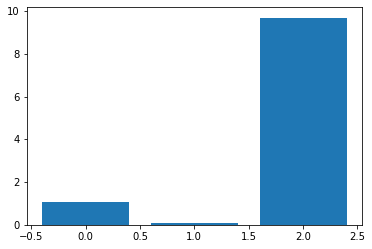

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# fit the model
model.fit(X, Y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.20537
Feature: 1, Score: 0.53222
Feature: 2, Score: 0.26241


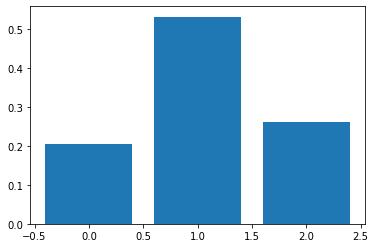

In [38]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

model = DecisionTreeRegressor()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.20439
Feature: 1, Score: 0.51629
Feature: 2, Score: 0.27932


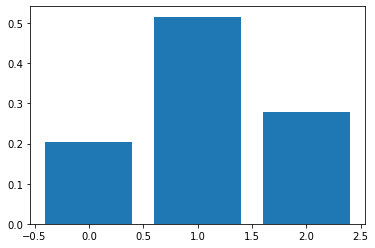

In [40]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset

model = RandomForestRegressor()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.18095
Feature: 1, Score: 0.44670
Feature: 2, Score: 0.25580
Feature: 3, Score: 0.11655


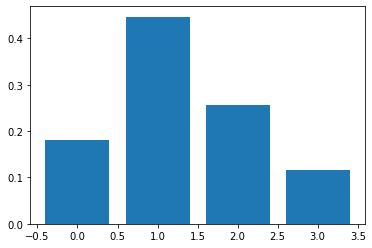

In [43]:
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
# define dataset

model = XGBRegressor()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 81.96536
Feature: 1, Score: 140.38583
Feature: 2, Score: 91.10065
Feature: 3, Score: 60.71363


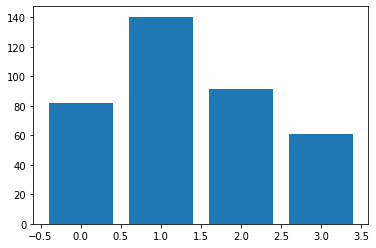

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset

model = KNeighborsRegressor()
# fit the model
model.fit(X, Y)
# perform permutation importance
results = permutation_importance(model, X, Y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [50]:
def evaluate(y_real,y_pred):
    mae = mean_absolute_error(y_real,y_pred)
    rmse = mean_squared_error(y_real,y_pred)**0.5
    r2 = r2_score(y_real,y_pred)
    return [mae,rmse,r2]
    

In [147]:
model = MLPRegressor(max_iter=1000,solver='lbfgs',learning_rate='constant',activation='relu',hidden_layer_sizes=(120,130,120))
# fit the model
scaler = StandardScaler()
train_s  = scaler.fit_transform(X_train,y_train)
test_s = scaler.transform(X_test)
model.fit(train_s, y_train)
y_pred = model.predict(test_s)
evaluate(y_test,y_pred)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[3.6048344964639836, 6.45164767762356, 0.6796745690446864]